# Анализ аптечной сети

У нас имеется датасет продаж аптечной сети за 2 дня, необходимо провести предобработку и сравнительный анализ данных

### Описание данных

- DR_Dat - дата продажи, 
- DR_Tim - времмя продажи, 
- DR_NChk - идентификатор чека, 
- DR_Apt - идентификатор аптеки, 
- DR_Kkm - номер кассовой смены, 
- DR_TDoc - тип документа(розничная реализация/приход/расход), 
- DR_TPay - тип платежа(наличные/безнал), 
- DR_CDrugs - артикул препарата, 
- DR_NDrugs - название препарата, 
- DR_Suppl - поставщик, 
- DR_Prod - производитель, 
- DR_Kol - количество позиций в чеке,
- DR_CZak - закупочная цена препарата, 
- DR_CRoz - розничная цена препарата, 
- DR_SDisc - сумма скидки, 
- DR_CDisc - идентификатор скидки, 
- DR_BCDisc - штрихкод скидки, 
- DR_TabEmpl - табельный номер сотрудника,
- DR_VZak - вид закупки(1-в аптеке,2-онлайн), 
- DR_Pos - номер позиции в чеке

**Предобработка данных**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_csv('./data.csv', encoding='1251')

In [4]:
df.tail(3)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,9907,Розничная реализация,18,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,Катрен г.Химки,Кадила Фармасьютикалз Лтд ( CADILA ),1.00,322.06,419.00,0.00,NaN,NaN,48,1,1.00
4461,2022-08-12,21:46:08,5694,18002542,18,9907,Розничная реализация,15,25673,БЕЛЬВЕДЕР ЛАК П/ОБГРЫЗАНИЯ НОГТЕЙ 8МЛ. [BELWEDER],Катрен г.Химки,BELWEDER NORD SIA,1.00,238.62,346.00,34.00,9.00,200010027618.00,48,1,1.00


In [5]:
df.shape

(4462, 21)

In [6]:
df.columns

Index(['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_Kkm', 'DR_TDoc',
       'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Prod', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos'],
      dtype='object')

In [7]:
our_cols = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_NDrugs', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_TPay', 'DR_CDrugs', 'DR_Suppl', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl', 'DR_VZak', 'DR_Pos']

In [8]:
df = df[our_cols]

In [9]:
df.head()

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_NDrugs,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_TPay,DR_CDrugs,DR_Suppl,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00


In [10]:
df.shape

(4462, 18)

In [11]:
df.columns = ['dt', 'c_time', 'nchk', 'ndoc', 'apt', 'drug', 'kol',
       'zak', 'roz', 'disc', 'pay_type', 'drug_id', 'suppl', 'disc_id', 'disc_barcode', 'empl', 'vzak', 'pos']

In [12]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00


In [13]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id         float64
disc_barcode    float64
empl              int64
vzak              int64
pos             float64
dtype: object

In [14]:
df['disc_barcode'] = df['disc_barcode'].astype('str').replace('\.0', '', regex=True)

In [15]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
suppl            object
disc_id         float64
disc_barcode     object
empl              int64
vzak              int64
pos             float64
dtype: object

In [16]:
df['disc_id'] = df['disc_id'].astype('str').replace('\.0', '', regex=True)

In [17]:
# преобразуем колонку dt в формат даты
df['dt'] = pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')

In [18]:
pd.to_datetime(df['dt']).dt.day_of_year

0       312
1       312
2       312
3       312
4       312
       ... 
4457    342
4458    342
4459    342
4460    342
4461    342
Name: dt, Length: 4462, dtype: int64

In [19]:
df['vzak'].unique()

array([1, 2], dtype=int64)

In [20]:
dict_vzak = {
    1: 'Обычный',
    2: 'Интернет'
}

In [21]:
df['vzak'] = df['vzak'].map(dict_vzak)

In [22]:
df.head(10)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00
5,11.08.2022,10:40:38,2176,2004598,2,БИСОПРОЛОЛ 5МГ. №60 ТАБ. П/П/О /ВЕРТЕКС/,1.00,152.90,182.00,9.00,18,187304,Пульс,9,200010001947,205,Обычный,1.00
6,11.08.2022,10:40:38,2176,2004598,2,ТРИХОПОЛ 250МГ. №20 ТАБ. /ПОЛЬФАРМА/,1.00,67.94,85.00,4.00,18,1261,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,9,200010001947,205,Обычный,2.00
7,11.08.2022,10:52:52,2177,2004598,2,НОРВАСК 5МГ. №30 ТАБ. /ПФАЙЗЕР/АПДЖОН/,1.00,157.76,189.00,9.00,18,2566,Катрен г.Химки,9,200010013331,205,Обычный,3.00
8,11.08.2022,10:52:52,2177,2004598,2,НОРВАСК 5МГ. №30 ТАБ. /ПФАЙЗЕР/АПДЖОН/,1.00,159.40,191.00,9.00,18,2566,Катрен г.Химки,9,200010013331,205,Обычный,4.00
9,11.08.2022,10:52:52,2177,2004598,2,СОТАГЕКСАЛ 80МГ. №20 ТАБ. /ГЕКСАЛ АГ/,1.00,71.97,90.00,4.00,18,5155,Катрен г.Химки,9,200010013331,205,Обычный,5.00


In [23]:
df.isna().any()

dt              False
c_time          False
nchk            False
ndoc            False
apt             False
drug            False
kol             False
zak             False
roz             False
disc            False
pay_type        False
drug_id         False
suppl           False
disc_id         False
disc_barcode    False
empl            False
vzak            False
pos             False
dtype: bool

**Оценим структуру датафрейма, описательные статистики, категориальные переменные, пропущенные значения, дубли**

In [24]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            4462 non-null   object 
 1   c_time        4462 non-null   object 
 2   nchk          4462 non-null   int64  
 3   ndoc          4462 non-null   int64  
 4   apt           4462 non-null   int64  
 5   drug          4462 non-null   object 
 6   kol           4462 non-null   float64
 7   zak           4462 non-null   float64
 8   roz           4462 non-null   float64
 9   disc          4462 non-null   float64
 10  pay_type      4462 non-null   int64  
 11  drug_id       4462 non-null   int64  
 12  suppl         4462 non-null   object 
 13  disc_id       4462 non-null   object 
 14  disc_barcode  4462 non-null   object 
 15  empl          4462 non-null   int64  
 16  vzak          4462 non-null   object 
 17  pos           4462 non-null   float64
dtypes: float64(5), int64(6), obj

In [26]:
df.describe()

,nchk,ndoc,apt,kol,zak,roz,disc,pay_type,drug_id,empl,pos
count,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00
mean,4903.14,10842995.33,10.84,1.03,241.64,306.05,10.56,16.90,259227.09,91.74,2.68
std,1839.70,6107181.40,6.11,0.54,454.56,532.17,31.37,1.45,299073.90,108.08,2.75
min,1698.00,2004595.00,2.00,0.01,0.01,0.01,0.00,15.00,3.00,25.00,1.00
25%,4187.00,6003620.00,6.00,1.00,36.64,52.00,0.00,15.00,29060.00,37.00,1.00
50%,4877.50,11007039.00,11.00,1.00,103.78,137.00,0.00,18.00,187304.00,53.00,2.00
75%,5472.75,18002536.00,18.00,1.00,299.06,391.75,7.00,18.00,377589.00,123.00,3.00
max,8490.00,18002543.00,18.00,20.00,11851.13,12345.00,650.00,18.00,1504498.00,605.00,24.00


In [27]:
df.duplicated().sum()

0

### Разведочный анализ данных
#### 1. Оценить распределение количества позиций в чеке

In [28]:
df.pos.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 23., 24., 22.])

In [29]:
df.pos.value_counts() 

1.00     2019
2.00      971
3.00      528
4.00      301
5.00      178
6.00      117
7.00       76
8.00       56
9.00       42
10.00      37
11.00      30
12.00      25
13.00      21
14.00      17
15.00      14
16.00       9
17.00       7
18.00       4
19.00       3
20.00       2
21.00       2
23.00       1
24.00       1
22.00       1
Name: pos, dtype: int64

<AxesSubplot:>

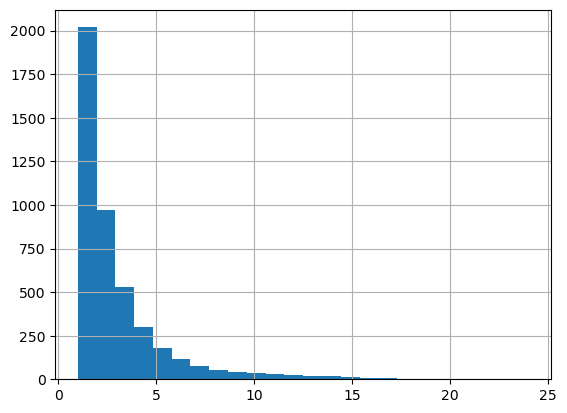

In [30]:
df.pos.hist(bins=24)

Вывод: в половине чеков есть хотя бы 2 позиции, в 1/4 есть 3 позиции и т.д.

#### 2. Оценить взаимосвязь между переменными

<AxesSubplot:>

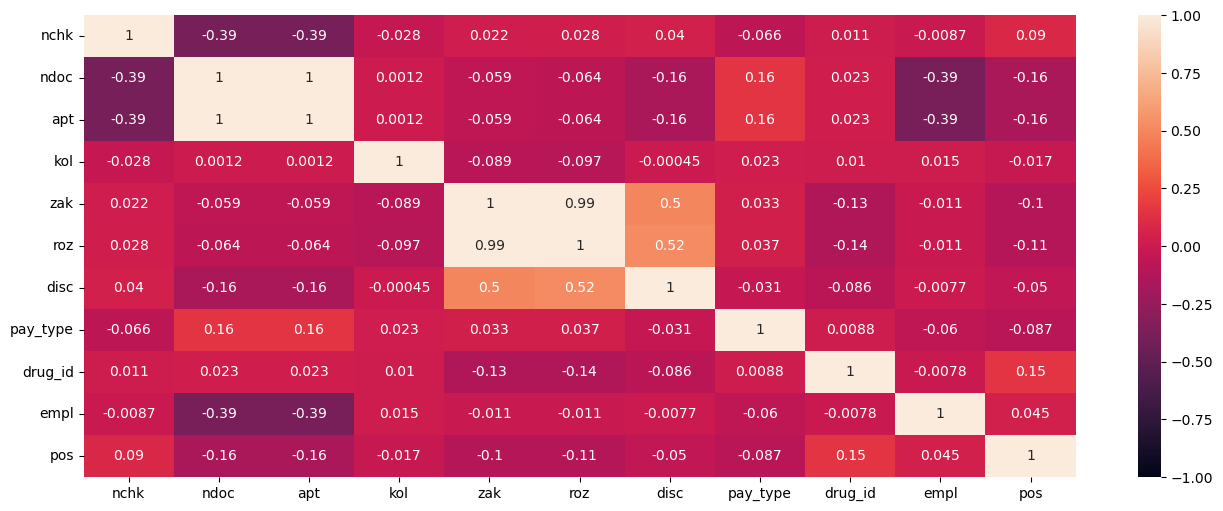

In [31]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True) 

Вывод: есть положительная корреляция(0.99) между закупочной и розничной ценой(чем больше закупочная цена, тем больше розничная цена), есть положительная корреляция(0.52) между скидкой и розничной ценой(чем больше розничная цена, тем больше скидка)

#### 3. Оценить распределение проданных позиций по часам

In [32]:
df['hour'] = pd.to_datetime(df.c_time).dt.hour

In [33]:
df.head()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,hour
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00,10
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00,10
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00,10
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10


In [34]:
gr = df.groupby(['hour'])['kol'].agg(sum)

In [35]:
gr

hour
8     20.10
9    236.50
10   361.65
11   326.55
12   311.59
13   422.80
14   358.30
15   432.97
16   375.88
17   375.45
18   457.50
19   419.29
20   388.57
21    97.71
22     1.00
Name: kol, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kol'>

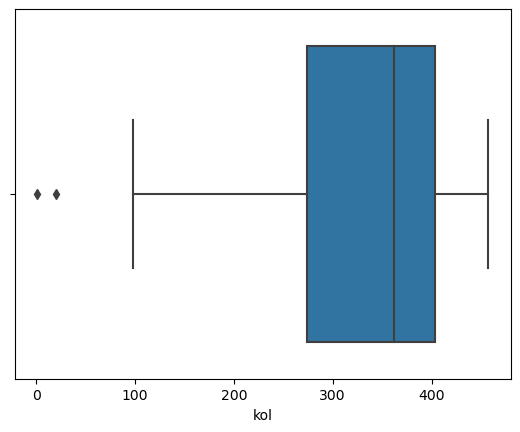

In [36]:
sns.boxplot(gr)

Вывод: в среднем продают около 380 позиций в час

#### 4. C разбивкой по чекам посчитать агрегатные характеристики

In [37]:
check_agg = df.groupby(['dt', 'nchk'])['kol', 'zak', 'roz'].agg({
    'kol': sum,
    'zak': sum,
    'roz': ['sum', 'max']
})

C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\888339661.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  check_agg = df.groupby(['dt', 'nchk'])['kol', 'zak', 'roz'].agg({


In [38]:
check_agg

kol    zak     roz       
                  sum    sum     sum    max
dt         nchk                            
11.08.2022 1698  1.00 342.30  463.00 463.00
           1699  1.00 545.27  720.00 720.00
           1700  1.00  36.68   60.00  60.00
           1701  4.00 756.12  955.00 443.00
           1702  1.00  76.55   94.00  94.00
...               ...    ...     ...    ...
12.08.2022 8486  1.00 302.07  460.00 460.00
           8487  1.00 396.66  476.00 476.00
           8488  1.00 187.84  220.00 220.00
           8489 18.00 778.61 1089.00 180.00
           8490  3.00 626.13  869.00 775.00

[1941 rows x 4 columns]

In [39]:
check_agg.reset_index()

dt  nchk   kol    zak     roz       
                         sum    sum     sum    max
0     11.08.2022  1698  1.00 342.30  463.00 463.00
1     11.08.2022  1699  1.00 545.27  720.00 720.00
2     11.08.2022  1700  1.00  36.68   60.00  60.00
3     11.08.2022  1701  4.00 756.12  955.00 443.00
4     11.08.2022  1702  1.00  76.55   94.00  94.00
...          ...   ...   ...    ...     ...    ...
1936  12.08.2022  8486  1.00 302.07  460.00 460.00
1937  12.08.2022  8487  1.00 396.66  476.00 476.00
1938  12.08.2022  8488  1.00 187.84  220.00 220.00
1939  12.08.2022  8489 18.00 778.61 1089.00 180.00
1940  12.08.2022  8490  3.00 626.13  869.00 775.00

[1941 rows x 6 columns]

#### 5. Посчитать прибыль за каждую дату по сотрудникам

In [40]:
diff_zak_roz= df.groupby(['dt', 'empl'])['zak', 'roz'].agg(sum)

C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\4107599584.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  diff_zak_roz= df.groupby(['dt', 'empl'])['zak', 'roz'].agg(sum)


In [41]:
diff_zak_roz['revenue'] = diff_zak_roz['roz'] - diff_zak_roz['zak']

In [42]:
diff_zak_roz # неправильный расчет прибыли

zak       roz  revenue
dt         empl                            
11.08.2022 25   72004.24  93030.00 21025.76
           30   90350.41 111916.97 21566.56
           36   62425.32  77368.03 14942.71
           47   68458.33  86626.01 18167.68
           50   72304.41  90830.01 18525.60
           53   37727.08  48746.00 11018.92
           54   52880.81  67517.08 14636.27
           123  88926.21 116678.03 27751.82
           205  49904.42  59471.00  9566.58
           605  28699.65  36954.01  8254.36
12.08.2022 37   92688.93 118091.37 25402.44
           48   72773.60  93032.02 20258.42
           54   65852.52  83229.05 17376.53
           110  89126.47 113275.05 24148.58
           123  99298.80 124231.66 24932.86
           205  34772.17  44595.01  9822.84

In [43]:
rev_by_empl = df.groupby(['dt', 'empl'])['zak', 'roz', 'kol']\
    .apply(lambda x: sum(x['kol']*(x['roz'] - x['zak'])))\
    .reset_index()\
    .rename(columns={0: 'revenue'})

C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\2036733425.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rev_by_empl = df.groupby(['dt', 'empl'])['zak', 'roz', 'kol']\


In [44]:
rev_by_empl.dt.value_counts()

11.08.2022    10
12.08.2022     6
Name: dt, dtype: int64

In [45]:
rev_by_empl.sort_values('revenue', ascending=False)

,dt,empl,revenue
7,11.08.2022,123,23756.34
14,12.08.2022,123,23167.41
13,12.08.2022,110,22711.32
10,12.08.2022,37,22613.80
0,11.08.2022,25,20642.29
1,11.08.2022,30,20328.67
11,12.08.2022,48,19244.82
4,11.08.2022,50,17384.41
3,11.08.2022,47,16983.79
12,12.08.2022,54,16801.83


Вывод: сотрудником 123 было получено больше всего выручки за 2 дня

#### 6. Оценить связь между объемом продажи и розничной ценой с разбивкой по датам

In [46]:
df.groupby(['dt', 'drug'])['roz', 'kol'].agg({
    'roz': np.mean, 
    'kol': sum
})

C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\1098215732.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['dt', 'drug'])['roz', 'kol'].agg({


roz  kol
dt         drug                                                           
11.08.2022 911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА     111.00 1.00
           911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.        104.00 1.00
           L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/          170.00 1.00
           L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/             93.00 1.00
           ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ....   96.00 1.00
...                                                               ...  ...
12.08.2022 ЭУФИЛЛИН 150МГ. №30 ТАБ. /ФАРМСТАНДАРТ/              31.00 2.00
           ЮНИЭНЗИМ С МПС №20 ТАБ. П/О                         141.00 1.00
           Я ЗАБОЧУСЬ О ЗДОРОВЬЕ ТРАВЯН.КОФЕ КОФЕЙНЫЙ НАПИ...  145.00 1.00
           ЯНТАРНАЯ К-ТА ФОРП 100МГ. №10 ТАБ.                   14.00 2.00
           ЯРИНА №21 ТАБ. П/П/О                               1292.00 1.00

[2304 rows x 2 columns]

Т.к. у нас данные только за 2 дня, некоторые препараты продавались однократно, то этого не достаточно для оценки связи. Поэтому можем решить задачу следующим способом - округлить розничную цену товаров до ближайшей сотни и провести оценку

In [47]:
df.roz 

0       51.00
1       31.00
2      209.00
3      210.00
4      787.00
        ...  
4457    75.00
4458    93.00
4459   396.00
4460   419.00
4461   346.00
Name: roz, Length: 4462, dtype: float64

In [48]:
df['rroz'] = df.roz.apply(lambda x: round(x, -2))
df.rroz

0      100.00
1        0.00
2      200.00
3      200.00
4      800.00
        ...  
4457   100.00
4458   100.00
4459   400.00
4460   400.00
4461   300.00
Name: rroz, Length: 4462, dtype: float64

In [49]:
sales_roz = df.groupby(['dt', 'rroz'])['kol'].agg(sum).reset_index()
sales_roz

,dt,rroz,kol
0,11.08.2022,0.00,770.00
1,11.08.2022,100.00,742.00
2,11.08.2022,200.00,328.43
3,11.08.2022,300.00,196.20
4,11.08.2022,400.00,133.00
...,...,...,...
68,12.08.2022,4400.00,1.00
69,12.08.2022,5000.00,1.00
70,12.08.2022,5800.00,1.00
71,12.08.2022,10200.00,1.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rroz', ylabel='kol'>

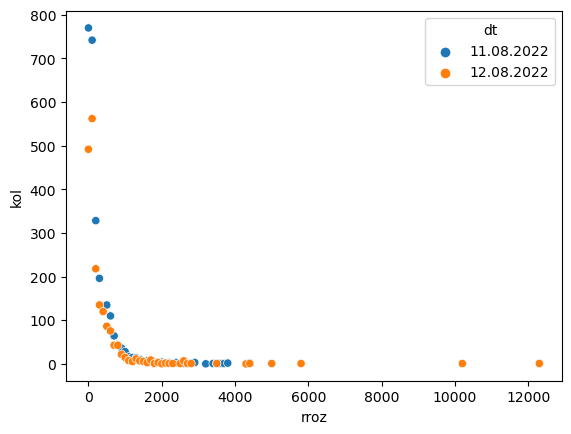

In [50]:
sns.scatterplot(sales_roz.rroz, sales_roz.kol, hue=sales_roz.dt)

In [51]:
#уберем выбросы, отфильтруем по стоимости до 2000 
sales_roz = sales_roz[sales_roz.loc[:, 'rroz'] < 2000] 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rroz', ylabel='kol'>

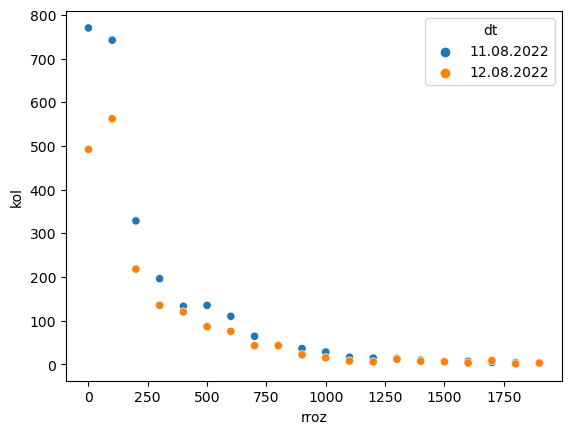

In [52]:
sns.scatterplot(sales_roz.rroz, sales_roz.kol, hue=sales_roz.dt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


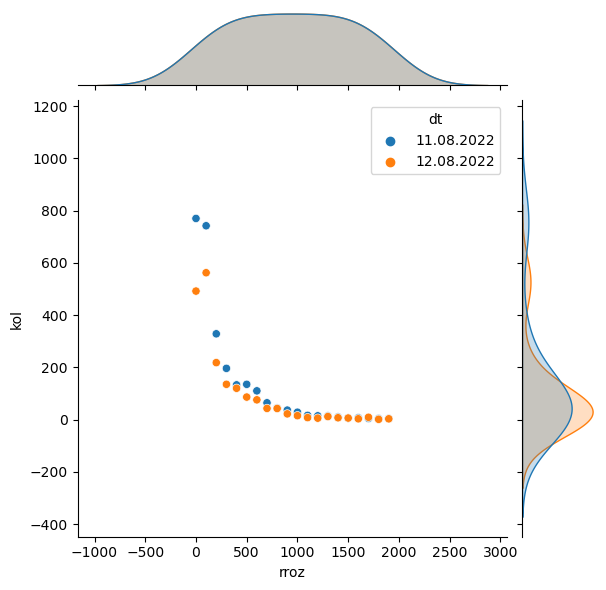

In [53]:
sns.jointplot(sales_roz.rroz, sales_roz.kol, hue=sales_roz.dt)

Вывод: чем ниже розничная цена, тем больше проданных позиций

#### 7. Оценить количество продаж в каждый день в каждой аптеке по каждому сотруднику с разбивкой по видам платежа

In [54]:
sales_by_apt_empl = df.groupby(['dt', 'apt', 'empl', 'pay_type'])['kol'].agg(sum).reset_index()

In [55]:
sales_by_apt_empl.head(10)

,dt,apt,empl,pay_type,kol
0,11.08.2022,2,123,15,151.05
1,11.08.2022,2,123,18,164.13
2,11.08.2022,2,205,15,65.11
3,11.08.2022,2,205,18,66.00
4,11.08.2022,6,25,15,95.00
5,11.08.2022,6,25,18,142.53
6,11.08.2022,7,605,15,67.04
7,11.08.2022,7,605,18,101.85
8,11.08.2022,11,30,15,179.00
9,11.08.2022,11,30,18,310.48


In [56]:
sales_by_apt_empl.pivot_table(values='kol', index=['dt', 'apt', 'empl'], columns=['pay_type']).reset_index()

pay_type,dt,apt,empl,15,18
0,11.08.2022,2,123,151.05,164.13
1,11.08.2022,2,205,65.11,66.00
2,11.08.2022,6,25,95.00,142.53
3,11.08.2022,7,605,67.04,101.85
4,11.08.2022,11,30,179.00,310.48
5,11.08.2022,13,50,180.40,151.78
6,11.08.2022,15,53,51.98,142.10
7,11.08.2022,17,36,54.73,186.94
8,11.08.2022,18,47,89.04,236.24
9,11.08.2022,18,54,65.10,198.77


In [57]:
# другой способ через преобразование первоначального датасета и вместо количества товаров рассмотрим розничную цену
sales_by_empl = df.pivot_table(values='roz', index=['dt', 'apt', 'empl'], columns=['pay_type'], aggfunc=sum) \
    .reset_index()

In [58]:
sales_by_empl.head(10)

pay_type,dt,apt,empl,15,18
0,11.08.2022,2,123,55981.01,60697.02
1,11.08.2022,2,205,27403.00,32068.00
2,11.08.2022,6,25,27402.00,65628.00
3,11.08.2022,7,605,17618.00,19336.01
4,11.08.2022,11,30,38692.32,73224.65
5,11.08.2022,13,50,44746.00,46084.01
6,11.08.2022,15,53,20155.00,28591.00
7,11.08.2022,17,36,20890.00,56478.03
8,11.08.2022,18,47,25685.01,60941.00
9,11.08.2022,18,54,12118.00,55399.08


In [59]:
# Обратное преобразование из вида pivot table
pd.melt(sales_by_empl, id_vars=['dt', 'apt', 'empl'], value_vars=[15, 18], var_name='p_type').head(10)

,dt,apt,empl,p_type,value
0,11.08.2022,2,123,15,55981.01
1,11.08.2022,2,205,15,27403.00
2,11.08.2022,6,25,15,27402.00
3,11.08.2022,7,605,15,17618.00
4,11.08.2022,11,30,15,38692.32
5,11.08.2022,13,50,15,44746.00
6,11.08.2022,15,53,15,20155.00
7,11.08.2022,17,36,15,20890.00
8,11.08.2022,18,47,15,25685.01
9,11.08.2022,18,54,15,12118.00


#### 8. Найти позиции, где было продано более 5 штук сразу или розничная цена больше 2000

In [60]:
df[(df['kol'] > 5) | (df['roz'] > 2000)]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
27,11.08.2022,11:50:16,2184,2004598,2,АКАТИНОЛ МЕМАНТИН 20МГ. №28 ТАБ. П/П/О /МЕРЦ Ф...,1.00,2545.84,2824.00,141.00,15,153467,ВИТТА КОМПАНИ ООО,9,200010014079,205,Обычный,1.00,11,2800.00
29,11.08.2022,11:50:16,2184,2004598,2,ПРАДАКСА 110МГ. №60 КАПС. /БЕРИНГЕР/,1.00,3076.03,3432.00,171.00,15,154600,Протек,9,200010014079,205,Обычный,5.00,11,3400.00
45,11.08.2022,13:10:54,2192,2004598,2,ЦЕФАЛИ АППАРАТ Д/ТЕРАПИИ МИГРЕНИ С ПРИНАДЛ.,1.00,11851.13,12345.00,0.00,18,455413,Протек,nan,nan,205,Интернет,1.00,13,12300.00
62,11.08.2022,14:47:12,2201,2004598,2,ДЖАРДИНС 10МГ. №30 ТАБ. П/П/О /БЕРИНГЕР/,1.00,2669.94,2945.00,147.00,15,296849,Катрен г.Химки,9,200010024690,205,Обычный,1.00,14,2900.00
65,11.08.2022,14:52:33,2203,2004598,2,"АКСАМОН 15МГ/МЛ. 1МЛ. №10 Р-Р Д/В/М,П/К АМП.",1.00,1559.37,2106.00,147.00,15,254247,Здравсервис,9,200010018590,205,Обычный,1.00,14,2100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,12.08.2022,16:33:37,4368,18002543,18,КРЕСТОР 5МГ. №28 ТАБ. П/П/О,1.00,1848.83,2275.00,0.00,18,151718,Фармкомплект ООО,nan,nan,54,Обычный,1.00,16,2300.00
3983,12.08.2022,17:02:34,4375,18002543,18,СОЛГАР ТРОЙНАЯ ОМЕГА-3 ЭПК/ДГК 950МГ. №50 КАПС...,1.00,1944.66,2529.00,0.00,18,168640,Здравсервис,nan,nan,54,Обычный,3.00,17,2500.00
4057,12.08.2022,19:29:31,4422,18002543,18,СОЛКОСЕРИЛ 20Г. ГЕЛЬ Д/НАРУЖ.ПРИМ. ТУБА,1.00,3778.85,4422.00,0.00,18,1131,Авеста,nan,nan,54,Обычный,3.00,19,4400.00
4058,12.08.2022,19:29:31,4422,18002543,18,ВИАГРА 100МГ. №12 ТАБ. П/П/О,1.00,8706.40,10187.00,0.00,18,353730,ГК Надежда Фарм,nan,nan,54,Обычный,1.00,19,10200.00


#### 9. Найти позиции, где тип платежа не 15 и не 20

In [61]:
df[~df.loc[:, 'pay_type'].isin([15, 20])]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,suppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,100.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,800.00
5,11.08.2022,10:40:38,2176,2004598,2,БИСОПРОЛОЛ 5МГ. №60 ТАБ. П/П/О /ВЕРТЕКС/,1.00,152.90,182.00,9.00,18,187304,Пульс,9,200010001947,205,Обычный,1.00,10,200.00
6,11.08.2022,10:40:38,2176,2004598,2,ТРИХОПОЛ 250МГ. №20 ТАБ. /ПОЛЬФАРМА/,1.00,67.94,85.00,4.00,18,1261,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,9,200010001947,205,Обычный,2.00,10,100.00
7,11.08.2022,10:52:52,2177,2004598,2,НОРВАСК 5МГ. №30 ТАБ. /ПФАЙЗЕР/АПДЖОН/,1.00,157.76,189.00,9.00,18,2566,Катрен г.Химки,9,200010013331,205,Обычный,3.00,10,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,12.08.2022,21:39:23,5689,18002542,18,АЛЬБАДЕНТ ОСВЕЖИТЕЛЬ Д/РТА ЛИМОН 35МЛ. СПРЕЙ,1.00,62.34,97.00,0.00,18,28488,Здравсервис,nan,nan,48,Обычный,1.00,21,100.00
4457,12.08.2022,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,Обычный,1.00,21,100.00
4458,12.08.2022,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,Обычный,1.00,21,100.00
4459,12.08.2022,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,Обычный,1.00,21,400.00


## 2. Анализ ассортимента аптеки


###  Одномерный АВС-анализ (по количеству)

Цель - выбрать наиболее/наименее прибыльные товары. 

АВС-анализ проводится по принципу Парето - 20% товаров дают 80% прибыли. ABC-анализ находит эти прибыльные 20%, разделив ассортимент на три группы:

- A — лидеры: 20% товаров, которые приносят 80% прибыли
- B — середнячки: 30%, которые приносят 15% прибыли
- C — аутсайдеры: оставшиеся 50%, которые составляют 5% прибыли

Для проведения анализа загрузим датафрейм, в котором хранятся данные продаж аптеки за 5 дней

In [62]:
data_2 = pd.read_csv('./data1.csv', encoding='1251')
data_2.head()

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-01,08:06:18,1272,13002561,13,22589,Розничная реализация,18,144734,ГАСТАЛ №12 ТАБ. Д/РАСС.,Пульс,TEVA Pharvaceutical Industries Ltd,1.00,196.71,270.00,0.00,NaN,NaN,29,1,1.00
1,2022-08-01,08:38:53,1273,13002561,13,22589,Розничная реализация,15,69661,"ТОБРОПТ 0,3% 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /РОМФАРМ/",Пульс,РОМФАРМ КОМПАНИ ( ROMPHARM ),1.00,106.21,127.00,6.00,9.00,200010004357.00,29,1,1.00
2,2022-08-01,08:55:38,1274,13002561,13,22589,Розничная реализация,18,190635,ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-М...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Пфайзер,1.00,2320.99,2563.00,76.00,9.00,200010018491.00,29,1,1.00
3,2022-08-01,09:00:40,1275,13002561,13,22589,Розничная реализация,18,276370,АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/Ф...,Пульс,ОТИСИФАРМ ПАО,1.00,445.39,541.00,0.00,NaN,NaN,29,1,1.00
4,2022-08-01,09:04:05,1276,13002561,13,22589,Розничная реализация,15,2303,"ЭНАМ 2,5МГ. №20 ТАБ. /Д-Р РЕДДИ/",Протек,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,18.04,22.00,1.00,9.00,200010000734.00,29,1,5.00


In [63]:
data_2.duplicated().sum()

0

In [65]:
data_2.shape

(1448, 21)

In [66]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DR_Dat      1448 non-null   object 
 1   DR_Tim      1448 non-null   object 
 2   DR_NChk     1448 non-null   int64  
 3   DR_NDoc     1448 non-null   int64  
 4   DR_Apt      1448 non-null   int64  
 5   DR_Kkm      1448 non-null   int64  
 6   DR_TDoc     1448 non-null   object 
 7   DR_TPay     1448 non-null   int64  
 8   DR_CDrugs   1448 non-null   int64  
 9   DR_NDrugs   1448 non-null   object 
 10  DR_Suppl    1448 non-null   object 
 11  DR_Prod     1448 non-null   object 
 12  DR_Kol      1448 non-null   float64
 13  DR_CZak     1448 non-null   float64
 14  DR_CRoz     1448 non-null   float64
 15  DR_SDisc    1448 non-null   float64
 16  DR_CDisc    884 non-null    float64
 17  DR_BCDisc   884 non-null    float64
 18  DR_TabEmpl  1448 non-null   int64  
 19  DR_VZak     1448 non-null  

в данных нет дублей, нет пропусков, все значения уникальны

In [67]:
groups_drug = data_2.groupby(['DR_NDrugs']).agg({'DR_Kol': 'sum'})
groups_drug.head()

,DR_Kol
DR_NDrugs,
"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКАХ 100МЛ. ТУБА",1.00
911-ГЕЛЬ-БАЛЬЗАМ Д/НОГ КОНСКИЙ КАШТАН 100МЛ. ТУБА,1.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ РАЗОГР. ОКОПНИК+МУРАВ.К-ТА 100МЛ.,1.00
L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,1.00
L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,1.00


In [68]:
(groups_drug['DR_Kol']/sum(groups_drug['DR_Kol'])).sort_values(ascending=False)

DR_NDrugs
ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/                                                       0.04
НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /СЛАВЯНСКАЯ АПТЕКА/                                      0.02
ПАКЕТ                                                                                             0.02
ВАЛИДОЛ 60МГ. №10 ТАБ. ПОДЪЯЗЫЧ. /ФАРМСТАНДАРТ/                                                   0.02
БОРНАЯ К-ТА 10Г. ДЕЗ.СР-ВО ПОР. (НДС 20%)                                                         0.01
                                                                                                  ... 
ГЛЮКОЗА 5% 200МЛ. №28 Р-Р Д/ИНФ. БУТ. /МОСФАРМ/                                                   0.00
ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №30 ПЕРУАН.БАЛЬЗАМ /АРТ.4923462/ [BRANOLIND]          0.00
СФМ ШПРИЦ 10МЛ. 3-Х КОМП. 0,8Х40ММ 21G №100 [SFM]                                                 0.00
СФМ ШПРИЦ 3МЛ. 3-Х КОМП. 0,6Х30ММ 23G №100 [SFM]               

In [69]:
groups_drug = (groups_drug['DR_Kol']/sum(groups_drug['DR_Kol'])).sort_values(ascending=False)

In [70]:
groups_drug = groups_drug.cumsum().reset_index()

In [71]:
groups_drug['abc'] = np.where(groups_drug['DR_Kol']<0.8, 'A', np.where(groups_drug['DR_Kol']<0.95, 'B', 'C'))
groups_drug

,DR_NDrugs,DR_Kol,abc
0,"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",0.04,A
1,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /СЛАВ...",0.06,A
2,ПАКЕТ,0.08,A
3,ВАЛИДОЛ 60МГ. №10 ТАБ. ПОДЪЯЗЫЧ. /ФАРМСТАНДАРТ/,0.10,A
4,БОРНАЯ К-ТА 10Г. ДЕЗ.СР-ВО ПОР. (НДС 20%),0.11,A
...,...,...,...
798,ГЛЮКОЗА 5% 200МЛ. №28 Р-Р Д/ИНФ. БУТ. /МОСФАРМ/,1.00,C
799,ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №3...,1.00,C
800,"СФМ ШПРИЦ 10МЛ. 3-Х КОМП. 0,8Х40ММ 21G №100 [SFM]",1.00,C
801,"СФМ ШПРИЦ 3МЛ. 3-Х КОМП. 0,6Х30ММ 23G №100 [SFM]",1.00,C


In [72]:
groups_drug[groups_drug['abc'] == 'A']['DR_NDrugs'].head(10).to_list()

['ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/',
 'НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /СЛАВЯНСКАЯ АПТЕКА/',
 'ПАКЕТ',
 'ВАЛИДОЛ 60МГ. №10 ТАБ. ПОДЪЯЗЫЧ. /ФАРМСТАНДАРТ/',
 'БОРНАЯ К-ТА 10Г. ДЕЗ.СР-ВО ПОР. (НДС 20%)',
 'ГЕМАТОГЕН РУССКИЙ ДЕТСКИЙ 40Г. ПЛИТКА /ФАРМ-ПРО/',
 'КОРВАЛОЛ 25МЛ. КАПЛИ Д/ПРИЕМА ВНУТРЬ ФЛ. И/У /ФАРМСТАНДАРТ ЛЕКСРЕДСТВА/',
 'ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 4Х10 №1 /ВЕРОФАРМ/',
 'РАУНАТИН 2МГ. №50 ТАБ. П/О /ЗДОРОВЬЕ/',
 'МЕНОВАЗИН 40МЛ. №1 СПИРТ. Р-Р Д/НАРУЖ.ПРИМ. ФЛ. /САМАРАМЕДПРОМ/']

In [73]:
groups_drug.tail(10)

,DR_NDrugs,DR_Kol,abc
793,ХАРТМАНН КОСМОПОР Е ПОВЯЗКА 10СМХ6СМ №25 П/ОПЕ...,1.00,C
794,"СФМ ШПРИЦ 5МЛ. 3-Х КОМП. 0,7Х40ММ 22G №100 [SFM]",1.00,C
795,"РЕГИДРОН 18,9Г. №20 ПОР. Д/Р-РА Д/ПРИЕМА ВНУТР...",1.00,C
796,ДИОКСИДИН 5МГ/МЛ. 10МЛ. №10 Р-Р Д/ИНФ. И НАРУЖ...,1.00,C
797,БАРАЛГИН М 500МГ. №100 ТАБ.,1.00,C
798,ГЛЮКОЗА 5% 200МЛ. №28 Р-Р Д/ИНФ. БУТ. /МОСФАРМ/,1.00,C
799,ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №3...,1.00,C
800,"СФМ ШПРИЦ 10МЛ. 3-Х КОМП. 0,8Х40ММ 21G №100 [SFM]",1.00,C
801,"СФМ ШПРИЦ 3МЛ. 3-Х КОМП. 0,6Х30ММ 23G №100 [SFM]",1.00,C
802,"ХАРТМАНН КОСМОПОР Е ПОВЯЗКА 7,2Х5СМ №50 П/ОПЕР...",1.00,C


In [74]:
groups_drug['abc'].value_counts()

A    452
B    242
C    109
Name: abc, dtype: int64

Нами проведен авс-анализ по 1 показателю - количеству проданных позиций, получилась достаточно большая группа А - 452 объекта, среди них наиболее продаваемые товар:лейкопластыри бактериальные (ВЕРОФАРМ), валидол, корвалол (ФАРМСТАНДАРТ), нафтизин (СЛАВЯНСКАЯ АПТЕКА). Группа С составила 109 товаров, т.е. к наименее продаваемым товарам относятся: СФМ шприцы, стерильные повязки ХАРТМАНН.

Однако для определения правильных управленческих решений не достаточно опираться лишь на один показатель. Поэтому дополнительно проведем анализ по выручке 

### Многомерный АВС-анализ (по количеству и по сумме проданной в рознице)

In [75]:
df_kol_roz = data_2.groupby('DR_NDrugs').agg({'DR_Kol': 'sum', 'DR_CRoz': 'sum'})

In [76]:
df_kol_roz['kol_part'] = (df_kol_roz['DR_Kol']/sum(df_kol_roz['DR_Kol']))

In [77]:
df_kol_roz = df_kol_roz.sort_values('kol_part', ascending=False)
df_kol_roz

,DR_Kol,DR_CRoz,kol_part
DR_NDrugs,,,
"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",68.00,32.00,0.04
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /СЛАВЯНСКАЯ АПТЕКА/",35.00,72.00,0.02
ПАКЕТ,26.00,52.00,0.02
ВАЛИДОЛ 60МГ. №10 ТАБ. ПОДЪЯЗЫЧ. /ФАРМСТАНДАРТ/,25.00,892.00,0.02
БОРНАЯ К-ТА 10Г. ДЕЗ.СР-ВО ПОР. (НДС 20%),22.00,28.00,0.01
...,...,...,...
ГЛЮКОЗА 5% 200МЛ. №28 Р-Р Д/ИНФ. БУТ. /МОСФАРМ/,0.07,724.00,0.00
ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №30 ПЕРУАН.БАЛЬЗАМ /АРТ.4923462/ [BRANOLIND],0.07,4095.00,0.00
"СФМ ШПРИЦ 10МЛ. 3-Х КОМП. 0,8Х40ММ 21G №100 [SFM]",0.05,1766.00,0.00


In [78]:
df_kol_roz['kol_cumsum'] = df_kol_roz['kol_part'].cumsum()

In [79]:
df_kol_roz['abc_kol'] = np.where(df_kol_roz['kol_cumsum']<0.8, 'A', np.where(df_kol_roz['kol_cumsum']<0.95, 'B', 'C'))

In [80]:
df_kol_roz

,DR_Kol,DR_CRoz,kol_part,kol_cumsum,abc_kol
DR_NDrugs,,,,,
"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",68.00,32.00,0.04,0.04,A
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /СЛАВЯНСКАЯ АПТЕКА/",35.00,72.00,0.02,0.06,A
ПАКЕТ,26.00,52.00,0.02,0.08,A
ВАЛИДОЛ 60МГ. №10 ТАБ. ПОДЪЯЗЫЧ. /ФАРМСТАНДАРТ/,25.00,892.00,0.02,0.10,A
БОРНАЯ К-ТА 10Г. ДЕЗ.СР-ВО ПОР. (НДС 20%),22.00,28.00,0.01,0.11,A
...,...,...,...,...,...
ГЛЮКОЗА 5% 200МЛ. №28 Р-Р Д/ИНФ. БУТ. /МОСФАРМ/,0.07,724.00,0.00,1.00,C
ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №30 ПЕРУАН.БАЛЬЗАМ /АРТ.4923462/ [BRANOLIND],0.07,4095.00,0.00,1.00,C
"СФМ ШПРИЦ 10МЛ. 3-Х КОМП. 0,8Х40ММ 21G №100 [SFM]",0.05,1766.00,0.00,1.00,C


In [81]:
df_kol_roz['roz_part'] = (df_kol_roz['DR_CRoz']/sum(df_kol_roz['DR_CRoz']))

In [82]:
df_kol_roz = df_kol_roz.sort_values('roz_part', ascending=False)

In [83]:
df_kol_roz['roz_cum'] = df_kol_roz['roz_part'].cumsum()

In [84]:
df_kol_roz['abc_roz'] = np.where(df_kol_roz['roz_cum'] < 0.85, 'A', np.where(df_kol_roz['roz_cum'] < 0.9, 'B', 'C'))

In [85]:
df_kol_roz

,DR_Kol,DR_CRoz,kol_part,kol_cumsum,abc_kol,roz_part,roz_cum,abc_roz
DR_NDrugs,,,,,,,,
ДЕТРАЛЕКС 1000МГ. №60 ТАБ. П/П/О,4.00,11948.00,0.00,0.39,A,0.03,0.03,A
КСАРЕЛТО 10МГ. №98 ТАБ. П/П/О /БАЙЕР/,0.14,10775.70,0.00,1.00,C,0.03,0.05,A
ПРАДАКСА 110МГ. №180 КАПС. /БЕРИНГЕР/,0.33,10375.00,0.00,1.00,C,0.02,0.08,A
ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-МАЙЕРС/,2.00,5126.00,0.00,0.63,A,0.01,0.09,A
ГЕЛАДРИНК ФОРТЕ ПОР. Д/ПРИЕМА ВНУТРЬ АПЕЛЬСИН 420Г. БАНКА,1.00,4985.00,0.00,0.85,B,0.01,0.10,A
...,...,...,...,...,...,...,...,...
ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 6X10 №1 /ВЕРОФАРМ/,13.00,16.00,0.01,0.17,A,0.00,1.00,C
"ХЛОРГЕКСИДИН 0,05% 100МЛ. №1 Р-Р Д/МЕСТ. И НАРУЖ.ПРИМ. ФЛ. ПЭТ. /ТУЛЬСКАЯ ФФ/",1.00,14.00,0.00,0.76,A,0.00,1.00,C
МЕРИДИАН МОЧЕПРИЕМНИК ДЕТСКИЙ PD2200 200МЛ. [MERIDIAN],4.00,12.00,0.00,0.38,A,0.00,1.00,C


In [86]:
df_kol_roz.columns

Index(['DR_Kol', 'DR_CRoz', 'kol_part', 'kol_cumsum', 'abc_kol', 'roz_part',
       'roz_cum', 'abc_roz'],
      dtype='object')

In [87]:
df_kol_roz[['DR_Kol', 'DR_CRoz', 'abc_kol', 'abc_roz']].reset_index().sort_values('DR_CRoz', ascending=False).tail(10)

,DR_NDrugs,DR_Kol,DR_CRoz,abc_kol,abc_roz
793,ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 4Х10 №1 /ВЕРОФАРМ/,14.00,18.00,A,C
794,ПИПЕТКА ГЛ. ТРАВМОБЕЗ. №1 ФУТ.,2.00,17.00,A,C
795,САЛФЕТКИ ДВУХСЛ. СТЕР. 16Х14СМ №10 И/У,1.00,17.00,A,C
796,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №1 Р-Р ДЕЗ.СР-ВО Ф...,2.00,16.00,A,C
797,БРИЛЛИАНТОВЫЙ ЗЕЛЕН 1% 10МЛ. №1 СПИРТ. Р-Р Д/Н...,1.00,16.00,B,C
798,ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 6X10 №1 /ВЕРОФАРМ/,13.00,16.00,A,C
799,"ХЛОРГЕКСИДИН 0,05% 100МЛ. №1 Р-Р Д/МЕСТ. И НАР...",1.00,14.00,A,C
800,МЕРИДИАН МОЧЕПРИЕМНИК ДЕТСКИЙ PD2200 200МЛ. [M...,4.00,12.00,A,C
801,БАХИЛЫ №10 (5ПАР),1.00,10.00,B,C
802,"Карта LOYALITY 0,01Р",12.00,0.12,A,C


In [88]:
df_kol_roz[['abc_kol','abc_roz']].value_counts(normalize=True)*100

abc_kol  abc_roz
A        C         25.90
         A         24.66
B        C         15.44
         A         11.96
C        A          7.85
A        B          5.73
C        C          4.73
B        B          2.74
C        B          1.00
dtype: float64

In [89]:
df_kol_roz[(df_kol_roz['abc_kol'] == 'A') & (df_kol_roz['abc_roz'] == 'A')].head(10)

,DR_Kol,DR_CRoz,kol_part,kol_cumsum,abc_kol,roz_part,roz_cum,abc_roz
DR_NDrugs,,,,,,,,
ДЕТРАЛЕКС 1000МГ. №60 ТАБ. П/П/О,4.00,11948.00,0.00,0.39,A,0.03,0.03,A
ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-МАЙЕРС/,2.00,5126.00,0.00,0.63,A,0.01,0.09,A
НИМЕСИЛ 100МГ. 2Г. №30 ГРАН. Д/СУСП. Д/ПРИЕМА ВНУТРЬ ПАК. /ГУИДОТТИ/МЕНАРИНИ/,1.30,4771.00,0.00,0.69,A,0.01,0.11,A
ОМРОН ТОНОМЕТР M2 БАЗИК АВТОМАТ АДАПТЕР /АРТ.HEM-7121-ARU/ [OMRON],1.00,3832.00,0.00,0.72,A,0.01,0.14,A
ИНЪЕКТРАН 100МГ/МЛ. 2МЛ. №10 Р-Р Д/В/М АМП.,2.00,3697.00,0.00,0.55,A,0.01,0.15,A
ДЮФАЛАК 667МГ/МЛ. 1000МЛ. СИРОП ФЛ. +МЕРН.СТАКАН /ЭББОТТ/СОЛВЕЙ/,3.00,2703.89,0.00,0.51,A,0.01,0.21,A
АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.,2.00,2628.00,0.00,0.63,A,0.01,0.22,A
ВИТАПРОСТ 10МГ. №10 СУПП. РЕКТ. /НИЖФАРМ/,2.00,2596.00,0.00,0.66,A,0.01,0.22,A
ТОНОМЕТР UA-604 П/АВТОМАТ [AND],1.00,2456.00,0.00,0.73,A,0.01,0.23,A


In [90]:
df_kol_roz[(df_kol_roz['abc_kol'] == 'C') & (df_kol_roz['abc_roz'] == 'C')].tail(10)

,DR_Kol,DR_CRoz,kol_part,kol_cumsum,abc_kol,roz_part,roz_cum,abc_roz
DR_NDrugs,,,,,,,,
МОЕ СОЛНЫШКО ПЕНКА Д/КУПАНИЯ БАЮ-БАЮШКИ ЛАВАНДА+РОЗ.МАСЛО 200МЛ.,1.00,104.00,0.00,0.98,C,0.00,0.97,C
МУКАЛТИН РЕНЕВАЛ 50МГ. №20 ТАБ. /ОБНОВЛЕНИЕ/,1.00,100.00,0.00,0.99,C,0.00,0.98,C
МОЕ СОЛНЫШКО МЫЛО ЖИДКОЕ МАСЛО АВОКАДО 300МЛ. ДОЗАТОР,1.00,98.00,0.00,0.98,C,0.00,0.98,C
ИБУПРОФЕН-ВЕРТЕ 5% 50Г. ГЕЛЬ Д/НАРУЖ.ПРИМ. ТУБА /ВЕРТЕКС/,1.00,97.00,0.00,0.96,C,0.00,0.98,C
МЕТФОРМИН-ТЕВА 500МГ. №60 ТАБ. П/П/О /ТЕВА/,1.00,93.00,0.00,0.99,C,0.00,0.98,C
"ЗВЕЗДОЧКА НОЗ 0,1% 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. +РАСП.",1.00,78.00,0.00,0.96,C,0.00,0.99,C
"ЕССЕНТУКИ ВОДА МИНЕР. №17 0,45Л. ГАЗ. СТЕКЛО",1.00,76.00,0.00,0.96,C,0.00,0.99,C
КЕТОРОЛАК 10МГ. №28 ТАБ. П/П/О /ОБНОВЛЕНИЕ/,1.00,74.00,0.00,0.98,C,0.00,0.99,C
НАРЗАН ВОДА МИНЕР. 1Л. ГАЗ. ПЭТ.,1.00,65.00,0.00,0.97,C,0.00,0.99,C


**Результаты:**

При проведении многомерного АВС-анализа по количеству и сумме проданной в розницу, группа АА составила 25% и включает в себя такие препараты, как детралекс, эликвис, нимесил. Наименее прибыльные товары - группа СС составила 5% и включает в себя следующие товары: кеторолак (ОБНОВЛЕНИЕ), минеральная вода нарзан и ессентуки, звездочка наз спрей.

Но более конкретные выводы и решения по продуктам мы сможем сделать после проведения XYZ-анализа и составления матрицы перекрестного ABC и XYZ-анализов

### Напишем ф-цию, которая принимает датафрейм и проводит по заданным колонкам АВС-анализ

In [91]:
def perform_abc(data, index):
    cols = list(data.columns)
    cols.remove(index)
    groupped_df = data.groupby(index).agg({col: sum for col in cols})
    for col in cols:
        groupped_df[f'rel_{col}'] = groupped_df[col]/sum(groupped_df[col])
        groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)
        groupped_df[f'cum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
        groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cum_{col}'] < 0.85, 
                                             'A', np.where(groupped_df[f'cum_{col}'] < 0.9, 'B', 'C'))
    return groupped_df[cols+[f'abc_{col}' for col in cols]]

In [92]:
df1 = df[['drug', 'nchk', 'ndoc', 'apt', 'kol', 'zak', 'roz', 'disc', 'pay_type',
       'drug_id', 'empl', 'pos', 'hour', 'rroz']]

In [93]:
perform_abc(df1, index='drug')

,nchk,ndoc,apt,kol,zak,roz,disc,pay_type,drug_id,empl,pos,hour,rroz,abc_nchk,abc_ndoc,abc_apt,abc_kol,abc_zak,abc_roz,abc_disc,abc_pay_type,abc_drug_id,abc_empl,abc_pos,abc_hour,abc_rroz
drug,,,,,,,,,,,,,,,,,,,,,,,,,,
"ТЕРАФЛЮ ЛИМОН ОТ ГРИППА И ПРОСТУДЫ 22,1Г. №14 ПОР. Д/Р-РА Д/ПРИЕМА ВНУТРЬ ПАК.",104557,312055148,312,7.00,12305.96,15638.00,153.28,354,7653180,909,52.00,348,16000.00,A,A,A,A,A,A,A,A,A,A,A,A,A
НИМЕСИЛ 100МГ. 2Г. №30 ГРАН. Д/СУСП. Д/ПРИЕМА ВНУТРЬ ПАК. /ГУИДОТТИ/МЕНАРИНИ/,49427,122061796,122,2.80,10970.71,14445.00,16.37,201,162888,953,21.00,164,14400.00,A,A,A,A,A,A,C,A,C,A,A,A,A
ИНГАВИРИН 90МГ. №10 КАПС. /ВАЛЕНТА/,86918,159076741,159,18.00,12482.55,13750.00,283.78,303,8432388,1513,45.00,266,14200.00,A,A,A,A,A,A,A,A,A,A,A,A,A
ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №30 ПЕРУАН.БАЛЬЗАМ /АРТ.4923462/ [BRANOLIND],21793,10012832,10,0.17,9285.84,12908.00,70.12,48,284349,283,7.00,34,12900.00,A,C,C,C,A,A,A,A,C,A,A,A,A
"ЭЛИКВИС 2,5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-МАЙЕРС/",20201,38021585,38,5.00,11498.06,12731.00,382.00,84,962300,439,20.00,80,12800.00,A,A,A,A,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
БРИЛЛИАНТОВЫЙ ЗЕЛЕН 1% 25МЛ. №1 СПИРТ. Р-Р Д/НАРУЖ.ПРИМ. ФЛ. /ИВАНОВСКАЯ ФФ/,4820,11007004,11,1.00,19.17,30.00,0.00,18,446308,30,1.00,20,0.00,C,C,C,C,C,C,C,C,A,C,C,A,C
АСКОРБИНКА ВИТАМИН С 25МГ. ДЕТСК. 3Г. №10 ТАБ. КРУТКА /ФАРМГРУПП/,8489,2004621,2,1.00,8.41,14.00,0.00,15,337422,123,2.00,20,0.00,A,C,C,A,C,C,C,C,B,A,C,A,C
МЕТРОНИДАЗОЛ 250МГ. №20 ТАБ. /ОЗОН/,8485,2004621,2,1.00,30.00,37.00,0.00,18,189132,123,3.00,20,0.00,A,C,C,A,C,C,C,C,C,A,B,A,C


### Оценим динамику продаж по дням

In [94]:
data_2['DR_Dat'].unique()

array(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
       '2022-08-05'], dtype=object)

In [95]:
data_2['DR_Apt'].unique()

array([13], dtype=int64)

In [96]:
# Группировка по датам, посчитать сумму продаж розничную с учетом скидки, количества
df_sales = data_2.groupby(['DR_Dat']) \
    .apply(lambda x: pd.Series({'revenue': sum(x['DR_Kol']*(x['DR_CRoz'] - x['DR_SDisc']))})) \
    .reset_index() \
    .rename(columns={0: 'rev'})
df_sales

,DR_Dat,revenue
0,2022-08-01,84565.93
1,2022-08-02,70820.55
2,2022-08-03,78052.97
3,2022-08-04,59109.73
4,2022-08-05,55695.56


In [97]:
df_sales['revenue'].rolling(2).sum()

0         NaN
1   155386.48
2   148873.51
3   137162.70
4   114805.30
Name: revenue, dtype: float64

In [98]:
# расчет динамики продаж способами rolling, shift, pct_change
df_sales['revenue_rol'] = df_sales['revenue'].rolling(2) \
    .apply(lambda x: (x.iloc[1]-x.iloc[0])/x.iloc[0])

In [99]:
df_sales['revenue_shifted'] = df_sales['revenue'].shift(1)

In [100]:
df_sales['revenue_shif'] = (df_sales['revenue']-df_sales['revenue_shifted'])/df_sales['revenue_shifted']

In [101]:
df_sales['revenue_pct'] = df_sales['revenue'].pct_change(1)

In [102]:
df_sales

,DR_Dat,revenue,revenue_rol,revenue_shifted,revenue_shif,revenue_pct
0,2022-08-01,84565.93,NaN,NaN,NaN,NaN
1,2022-08-02,70820.55,-0.16,84565.93,-0.16,-0.16
2,2022-08-03,78052.97,0.10,70820.55,0.10,0.10
3,2022-08-04,59109.73,-0.24,78052.97,-0.24,-0.24
4,2022-08-05,55695.56,-0.06,59109.73,-0.06,-0.06


<AxesSubplot:title={'center':'Динамика продаж'}, xlabel='DR_Dat'>

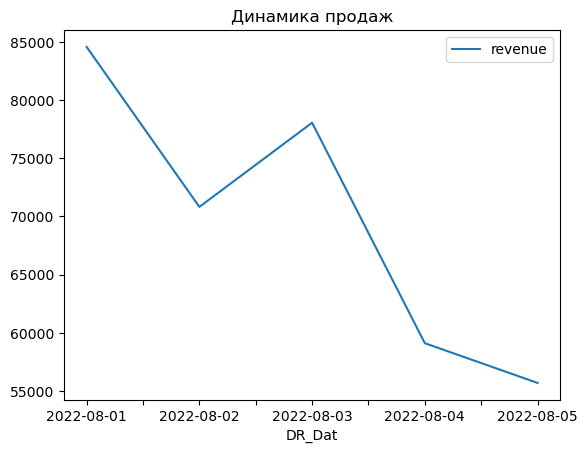

In [103]:
df_sales.plot(x='DR_Dat', y='revenue', kind='line', title='Динамика продаж')

Вывод: динамика продаж за 5 дней имеет отрицательную тенденцию

## Проведем XYZ-анализ

Для этого рассчитаем, как меняется объём продаж в течении 5 дней. 
По каждой товарной группе определим коэффициент вариации, который показывает колебание спроса за отдельно взятый период

In [104]:
df_xyz = data_2.groupby(['DR_Dat', 'DR_NDrugs']) \
    .agg({'DR_Kol': sum}) \
    .reset_index()     

In [105]:
df_xyz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DR_Dat     1089 non-null   object 
 1   DR_NDrugs  1089 non-null   object 
 2   DR_Kol     1089 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.6+ KB


In [106]:
df_xyz.groupby('DR_NDrugs').apply(lambda x: x.std()/x.mean())

C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\2023610638.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_xyz.groupby('DR_NDrugs').apply(lambda x: x.std()/x.mean())


,DR_Kol
DR_NDrugs,
"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКАХ 100МЛ. ТУБА",NaN
911-ГЕЛЬ-БАЛЬЗАМ Д/НОГ КОНСКИЙ КАШТАН 100МЛ. ТУБА,NaN
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ РАЗОГР. ОКОПНИК+МУРАВ.К-ТА 100МЛ.,NaN
L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,NaN
L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,NaN
...,...
ЭСВИЦИН СР-ВО П/ОБЛЫСЕНИЯ ЛОСЬОН-ТОНИК 250МЛ. ФЛ. /ВИО-ФАРМ/,0.29
ЭСПУМИЗАН 40МГ. №25 КАПС. /БЕРЛИН-ХЕМИ/,NaN
ЭТОРИАКС 90МГ. №7 ТАБ. П/П/О,NaN


Некоторые товары продавались 1 день, поэтому при подсчете коэффициента вариации рез-том является NaN, 
меняем в формуле измерение станд отклонения с помощью библиотеки Numpy

In [107]:
df_xyz.groupby('DR_NDrugs').apply(lambda x: np.std(x)/x.mean())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\2148848324.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_xyz.groupby('DR_NDrugs').apply(lambda x: np.std(x)/x.mean())


,DR_Kol
DR_NDrugs,
"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКАХ 100МЛ. ТУБА",0.00
911-ГЕЛЬ-БАЛЬЗАМ Д/НОГ КОНСКИЙ КАШТАН 100МЛ. ТУБА,0.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ РАЗОГР. ОКОПНИК+МУРАВ.К-ТА 100МЛ.,0.00
L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.00
L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.00
...,...
ЭСВИЦИН СР-ВО П/ОБЛЫСЕНИЯ ЛОСЬОН-ТОНИК 250МЛ. ФЛ. /ВИО-ФАРМ/,0.25
ЭСПУМИЗАН 40МГ. №25 КАПС. /БЕРЛИН-ХЕМИ/,0.00
ЭТОРИАКС 90МГ. №7 ТАБ. П/П/О,0.00


Посчитаем количество дней, в которые продавался товар; 

отберем в список те товары, которые продавались более 1 дня

In [108]:
df1 = df_xyz.groupby('DR_NDrugs').agg({'DR_Dat': 'count'}).reset_index()
xyz_names = list(df1[df1['DR_Dat'] > 1]['DR_NDrugs'])

Отфильтруем данные и посчитаем коэффициент вариации

In [109]:
df_koef = df_xyz[df_xyz['DR_NDrugs'].isin(xyz_names)]
df_koef = df_koef.groupby('DR_NDrugs').apply(lambda x: x.std()/x.mean())
df_koef

C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\2388659585.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_koef = df_koef.groupby('DR_NDrugs').apply(lambda x: x.std()/x.mean())


,DR_Kol
DR_NDrugs,
L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,0.00
L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.47
АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.,0.00
АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/,0.47
АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/ФАРМСТАНДАРТ/,0.43
...,...
"ЭВО ПАНТЕНОЛ ПОМАДА ГИГИЕН. 2,8Г. [EVO] /АВАНТА/",0.47
ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-МАЙЕРС/,0.00
ЭМОКСИПИН 10МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ. КРЫШ/КАП.,0.47


определим товар по группам по коэффициенту вариации

In [110]:
df_koef['XYZ'] = np.where(df_koef['DR_Kol']<0.1, 'X', np.where(df_koef['DR_Kol']<0.25, 'Y', 'Z'))
df_koef

,DR_Kol,XYZ
DR_NDrugs,,
L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,0.00,X
L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.47,Z
АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.,0.00,X
АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/,0.47,Z
АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/ФАРМСТАНДАРТ/,0.43,Z
...,...,...
"ЭВО ПАНТЕНОЛ ПОМАДА ГИГИЕН. 2,8Г. [EVO] /АВАНТА/",0.47,Z
ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-МАЙЕРС/,0.00,X
ЭМОКСИПИН 10МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ. КРЫШ/КАП.,0.47,Z


In [111]:
df_koef['XYZ'].value_counts()

Z    98
X    81
Y     3
Name: XYZ, dtype: int64

In [112]:
df_koef[df_koef['XYZ'] == 'Y']

,DR_Kol,XYZ
DR_NDrugs,,
"СФМ ШПРИЦ 5МЛ. 3-Х КОМП. 0,7Х40ММ 22G №100 [SFM]",0.13,Y
ТАУРИН 4% 10МЛ. ГЛ.КАПЛИ ФЛ./КАП. /СЛАВЯНСКАЯ АПТЕКА/,0.20,Y
ХЕЛП БИНТ СТЕР. 7МХ14СМ И/У [HELP],0.25,Y


### В ходе xyz-анализа товары были распределены на 3 группы:
- X — товары со стабильным спросом = покупают регулярно в примерно равных объемах. 
- Y — с условно-стабильным спросом, который меняется, но незначительно
- Z — товары со случайным спросом = нестабильные продажи с резкими перепадами. 

Однако, следует помнить, что результаты XYZ-анализа будут достоверны, только если анализируется достаточно длительный период времени. Также XYZ анализ невозможен, если в ассортименте много новых товаров и/или поставки идут с перебоями


Соединим результаты с АВС анализом, чтобы провести комплексное исследование ассортиментной матрицы.

In [113]:
df_merge = df_koef.merge(df_kol_roz, how='inner', on='DR_NDrugs').reset_index()
df_merge

,DR_NDrugs,DR_Kol_x,XYZ,DR_Kol_y,DR_CRoz,kol_part,kol_cumsum,abc_kol,roz_part,roz_cum,abc_roz
0,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,0.00,X,2.00,199.00,0.00,0.63,A,0.00,0.93,C
1,L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.47,Z,3.00,432.00,0.00,0.45,A,0.00,0.78,A
2,АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.,0.00,X,2.00,2628.00,0.00,0.63,A,0.01,0.22,A
3,АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/,0.47,Z,3.00,303.00,0.00,0.43,A,0.00,0.86,B
4,АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/Ф...,0.43,Z,4.00,2158.00,0.00,0.41,A,0.01,0.28,A
...,...,...,...,...,...,...,...,...,...,...,...
177,"ЭВО ПАНТЕНОЛ ПОМАДА ГИГИЕН. 2,8Г. [EVO] /АВАНТА/",0.47,Z,3.00,118.00,0.00,0.47,A,0.00,0.97,C
178,ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-М...,0.00,X,2.00,5126.00,0.00,0.63,A,0.01,0.09,A
179,ЭМОКСИПИН 10МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ. КРЫШ/КАП.,0.47,Z,3.00,870.00,0.00,0.45,A,0.00,0.57,A
180,ЭНАЛАПРИЛ 5МГ. №20 ТАБ. /ХЕМОФАРМ/,0.47,Z,6.00,238.00,0.00,0.31,A,0.00,0.91,C


In [114]:
df_merge.columns

Index(['DR_NDrugs', 'DR_Kol_x', 'XYZ', 'DR_Kol_y', 'DR_CRoz', 'kol_part',
       'kol_cumsum', 'abc_kol', 'roz_part', 'roz_cum', 'abc_roz'],
      dtype='object')

In [115]:
df_matrix = df_merge[['DR_NDrugs', 'XYZ', 'abc_roz']]
df_matrix.head()

,DR_NDrugs,XYZ,abc_roz
0,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,X,C
1,L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,Z,A
2,АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.,X,A
3,АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/,Z,B
4,АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/Ф...,Z,A


In [116]:
df_matrix['abc_xyz'] = df_merge['abc_roz'].astype(str) + df_merge['XYZ'].astype(str)

C:\Users\ezhiv\AppData\Local\Temp\ipykernel_9692\710155007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matrix['abc_xyz'] = df_merge['abc_roz'].astype(str) + df_merge['XYZ'].astype(str)


<AxesSubplot:xlabel='XYZ', ylabel='abc_roz'>

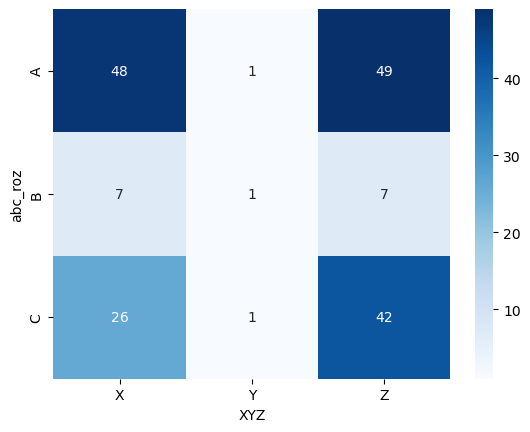

In [117]:
grouped_ABC_XYZ = df_matrix.groupby(['abc_roz', 'XYZ']).count()
result = grouped_ABC_XYZ.pivot_table(index = 'abc_roz', columns= 'XYZ', values= 'DR_NDrugs')
sns.heatmap(result, annot = True, fmt = '', cmap = 'Blues')

Построена ассортиментная матрица ассортимента аптеки по данным за 5 дней. 
- AX - позиции с высоким оборотом и имеющие стабильный спрос, важно иметь запас на складе, но не обязательно избыточный, стоит регулярно пересматривать количество по итогам прошлых периодов, чтобы не столкнуться с потерей прибыли из-за образовавшегося дефицита. Хорошо по товарам предусмотреть резервного поставщика на случай, если основной сорвет сроки поставки.
- BX – средний оборот и стабильный спрос. По данной группе товаров можно использовать систему "точно в срок", чтобы не создавать избыточный запас. 
- АY и BY — приносят высокий доход, но имеют менее стабильный спрос. Они тоже должны быть на складе, чтобы в случае внезапного наплыва клиентов не упустить прибыль. 
- AZ и BZ— приносят существенный доход, однако прогнозировать спрос на них очень тяжело. Хранить большой запас этих позиций рискованно – их могут так и не купить, заморозив часть ваших средств. Оптимальный вариант – иметь поставщика, который в случае необходимости оперативно привезет партию. 
- CX – стабильные товары, но не приносящие существенной прибыли. Следует держать на складе необходимое количество. 
- CY – низкий объем продаж и нестабильный спрос. При заполнении склада эти позиции закупаются в последнюю очередь, когда более востребованные уже оплачены. Ну а если вдруг товара не окажется на складе – аптека почти ничего не потеряет. 
- CZ —  самый низкий показатель и по объему продаж, и по спросу. Тут могут оказаться позиции, которые потеряли актуальность, новинки, или мелкие сопутствующие товары. Нужно рассматривать каждый объект отдельно, чтобы случайно не отказаться от продуктов, которые повышают лояльность потребителей. 
